# 载入数据集

In [2]:
import cv2
import numpy as np
from tqdm import tqdm

n = 25000
width = 128

X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n,), dtype=np.uint8)

for i in tqdm(range(n/2)):
    X[i] = cv2.resize(cv2.imread('train/cat.%d.jpg' % i), (width, width))
    X[i+n/2] = cv2.resize(cv2.imread('train/dog.%d.jpg' % i), (width, width))

y[n/2:] = 1

100%|██████████| 12500/12500 [00:40<00:00, 308.77it/s]


# 分为训练集和验证集

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 数据集可视化

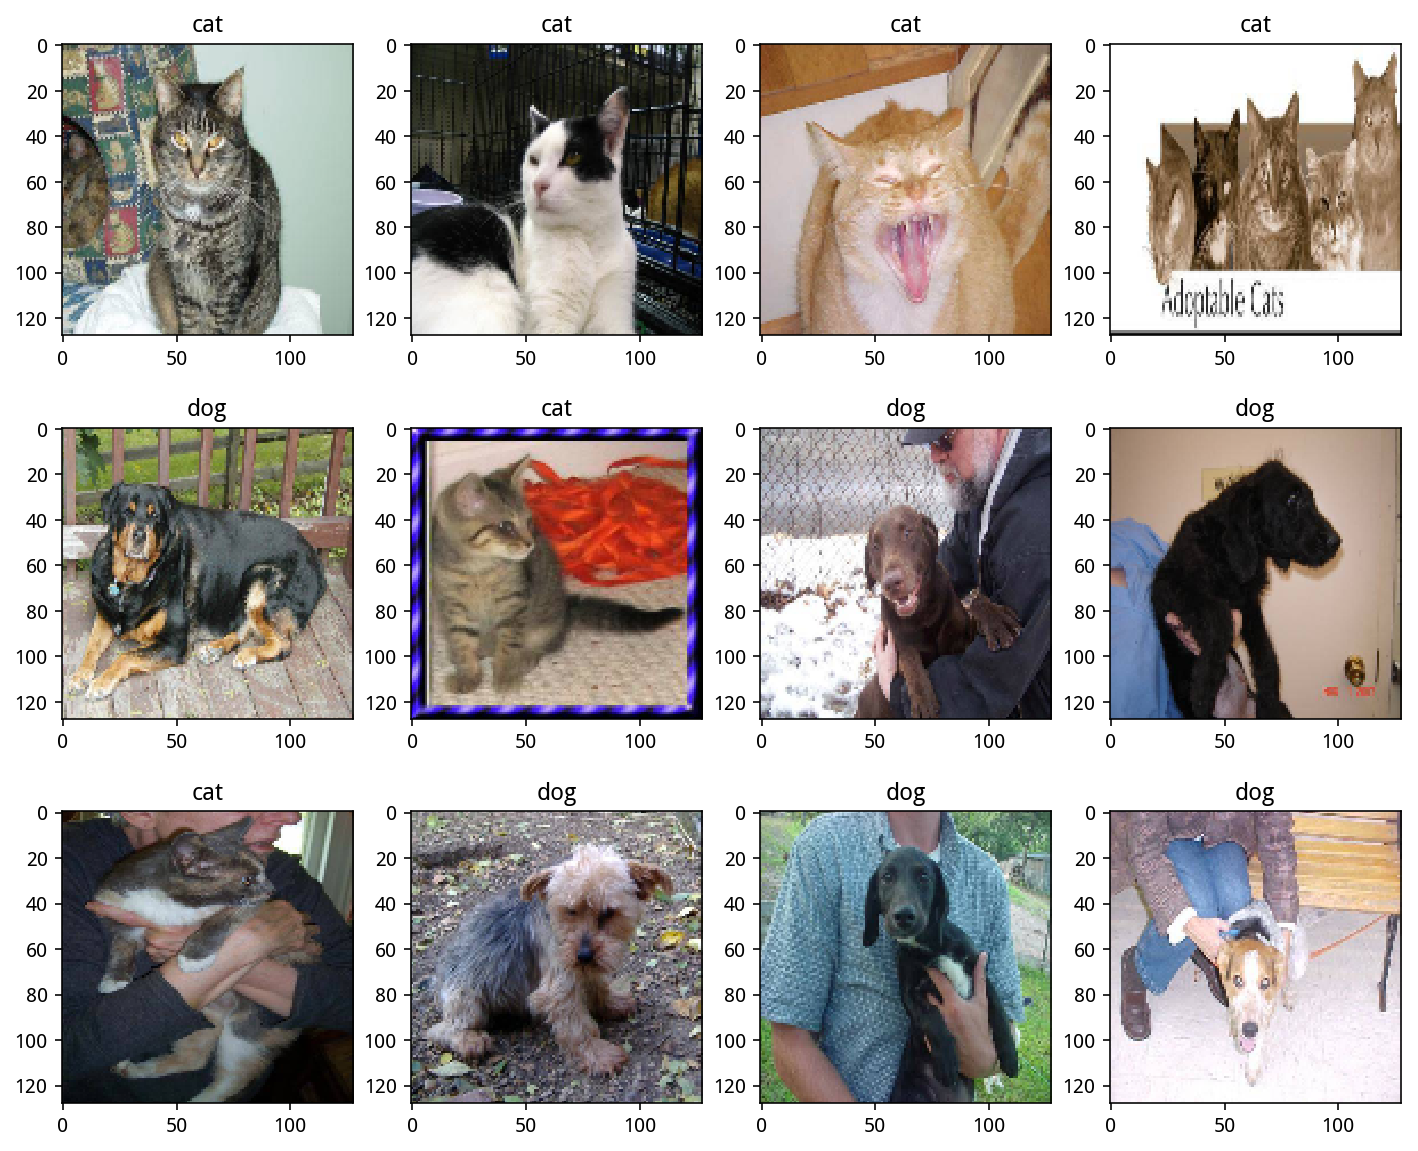

In [4]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 10))
for i in range(12):
    random_index = random.randint(0, n-1)
    plt.subplot(3, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title(['cat', 'dog'][y[random_index]])

# 搭建模型

In [5]:
from keras.layers import *
from keras.models import *

Using TensorFlow backend.


In [7]:
inputs = Input((width, width, 3))
x = inputs
for i, layer_num in enumerate([2, 2, 3, 3, 3]):
    for j in range(layer_num):
        x = Conv2D(32*2**i, 3, padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs, x)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
h = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 75s - loss: 0.7235 - acc: 0.6231 - val_loss: 0.7887 - val_acc: 0.5744
Epoch 2/50
20000/20000 [==============================] - 73s - loss: 0.5924 - acc: 0.7052 - val_loss: 0.6441 - val_acc: 0.7502
Epoch 3/50
20000/20000 [==============================] - 73s - loss: 0.4981 - acc: 0.7658 - val_loss: 0.4211 - val_acc: 0.8116
Epoch 4/50
20000/20000 [==============================] - 73s - loss: 0.3892 - acc: 0.8274 - val_loss: 0.6067 - val_acc: 0.7386
Epoch 5/50
20000/20000 [==============================] - 73s - loss: 0.3001 - acc: 0.8727 - val_loss: 0.3451 - val_acc: 0.8490
Epoch 6/50
20000/20000 [==============================] - 73s - loss: 0.2324 - acc: 0.9033 - val_loss: 0.2538 - val_acc: 0.8900
Epoch 7/50
20000/20000 [==============================] - 73s - loss: 0.1926 - acc: 0.9215 - val_loss: 0.2116 - val_acc: 0.9128
Epoch 8/50
20000/20000 [==============================]

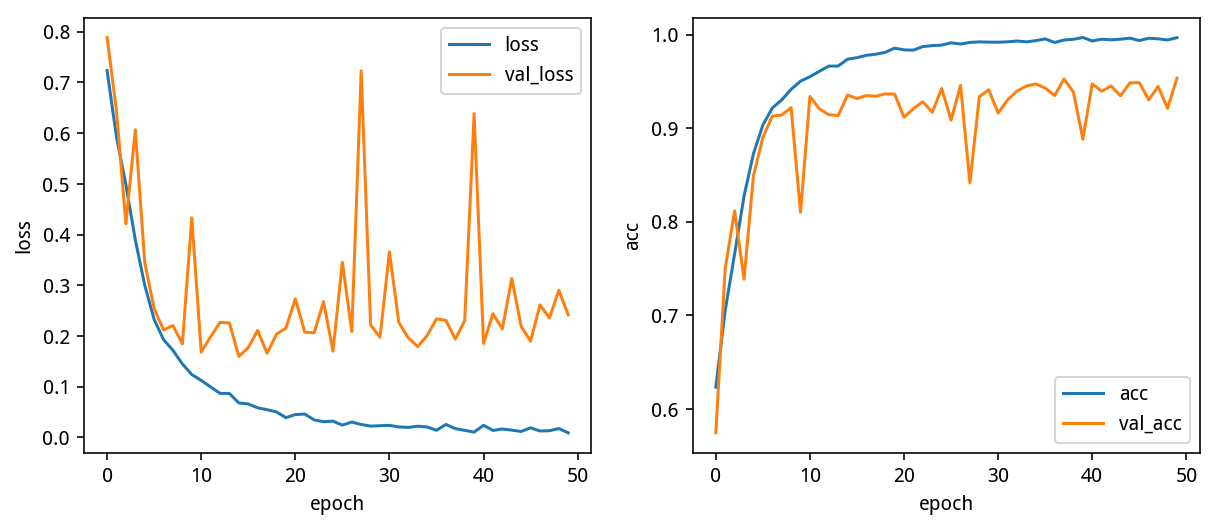

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')